# Final Project Synthetic Biology: Robustness Analysis and Bistability

## Overview

In this notebook I will explore the concept of robustness in bistability in genetic circuits. Bistability is the phenomena where a dynamical system has two different stable states. The system will sit in either of these states until it is perturbed or induced to switch to the other. In genetic circuits bistabilty can lead to all-or-none dynamics, where genes are either turned all the way on or all the way off in response to a stimuli. I will start by quantifying robustness in a simple form of bistability that arises from positive autoregulation with ultrasensitivity (CASE:1). I will then look at bistability in the model for a genetic toggle switch from [Gardner et al](https://www.nature.com/articles/35002131) (CASE:2). Lastly, I will try to plot the robustness in both cases against the common factor of non-linearity (n in case 1 and beta or gamma in case 2) and check which comparisons can be drawn between the robustness of the 2 systems. By robust, I mean that bistability is exhibited over a wide range of parameter values and that the two states are tolerant of the fluctuations inherent in gene expression (the toggle switch will not flip randomly between states) [Gardner et al](https://www.nature.com/articles/35002131). Bistability is also used to make cellular memory units that respond to and remember specific transient inputs. 


In [ ]:
%reset

In [2]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


### Case:1 
### Robustness Analysis in a Bistable Model (Positive Autoregulation with Ultrasensitivity)

We will start with a simple model of gene regulation that leads to bistability (the gene is off or on). In this circuit, the gene exhibits positive autoregulation, it increases its own expression. This positive effect is also ultrasensitive, it has a sharper sensitivity to protein concentration than a standard Michaelis Menten curve. We will explore what these dynamics look like and how they arise using the Hill equation.

We can express the dynamics of protein concentration using the following equation: 

$\large \frac{dx}{dt} = \frac{Cx^{n}}{k^{n}+x^{n}} - \alpha x$

Here the first term is a positive autoregulation Hill equation, and the second is a linear protein dependent degredation. The Hill equation has two parameters: $k$ is the half maximal concnetration (analogous to $K_M$ in the Michaelis Menten equation), and $n$ is the Hill coefficient. A general rule for the Hill coefficient is that it coresponds to the number of monomers the regulator is made from, so if the protein regulating expression is a dimer (two proteins that bind together) then $n=2$. A Hill coefficient greater than 1 ($n>1$) leads to ultrasensitivity and bistability.

We will plot the positive and negative components of this function against x to graphically visualize the dynamics of the system, and understand where the steady states occur ($\frac{dx}{dt}=0$).

The distance between the unstable steady state and the outer stable steady state(intersection points)  typically indicates the robustness of the system. This distance can be used as a metric to compare the robustness of different toggle switch designs or to optimize the parameters of the system to achieve desired robustness properties.


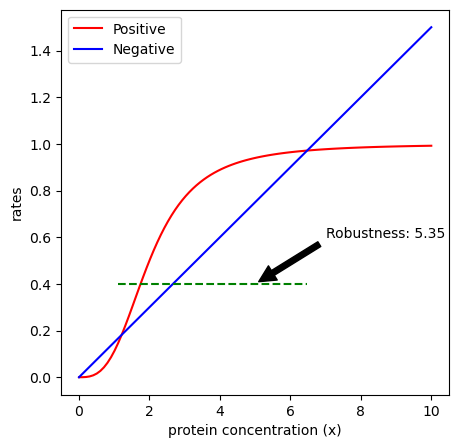

In [6]:
# Define parameters
x = np.linspace(0,10,100)
n = 3
k = 2
C = 1
alpha = 0.15

# Calculate positive and negative components
positive = C*x**n/(k**n+x**n)
negative = alpha * x

# Find intersection points
intersection_indices = np.where(np.diff(np.sign(positive - negative)))[0]
intersections = x[intersection_indices]

# Calculate distance between intersection points
robustness = intersections[-1] - intersections[1]  # Distance between outermost stable state and unstable state

# Plot positive and negative components
[fig,axs] = plt.subplots(1,1,figsize=[5,5])
axs.plot(x,positive,'r')
axs.plot(x,negative,'b')
axs.set_xlabel('protein concentration (x)')
axs.set_ylabel('rates')
axs.legend(['Positive','Negative']);

# Annotate the plot with robustness parameter
axs.annotate(f'Robustness: {robustness:.2f}', xy=(5, 0.4), xytext=(7, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Visualize robustness with a line
axs.plot([intersections[1], intersections[-1]], [0.4, 0.4], 'g--')  # Plotting a green dashed line


plt.show()

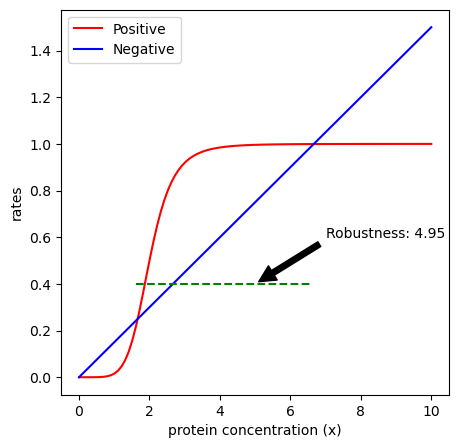

In [11]:
# Define parameters
x = np.linspace(0,10,100)
n = 6
k = 2
C = 1
alpha = 0.15

# Calculate positive and negative components
positive = C*x**n/(k**n+x**n)
negative = alpha * x

# Find intersection points
intersection_indices = np.where(np.diff(np.sign(positive - negative)))[0]
intersections = x[intersection_indices]

# Calculate distance between intersection points
robustness = intersections[-1] - intersections[1]  # Distance between outermost stable state and unstable state

# Plot positive and negative components
[fig,axs] = plt.subplots(1,1,figsize=[5,5])
axs.plot(x,positive,'r')
axs.plot(x,negative,'b')
axs.set_xlabel('protein concentration (x)')
axs.set_ylabel('rates')
axs.legend(['Positive','Negative']);

# Annotate the plot with robustness parameter
axs.annotate(f'Robustness: {robustness:.2f}', xy=(5, 0.4), xytext=(7, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Visualize robustness with a line
axs.plot([intersections[1], intersections[-1]], [0.4, 0.4], 'g--')  # Plotting a green dashed line


plt.show()

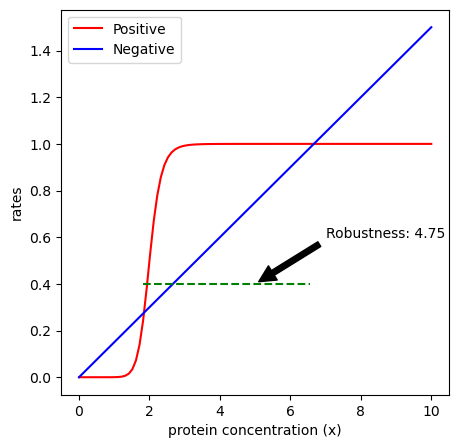

In [12]:
# Define parameters
x = np.linspace(0,10,100)
n = 12
k = 2
C = 1
alpha = 0.15

# Calculate positive and negative components
positive = C*x**n/(k**n+x**n)
negative = alpha * x

# Find intersection points
intersection_indices = np.where(np.diff(np.sign(positive - negative)))[0]
intersections = x[intersection_indices]

# Calculate distance between intersection points
robustness = intersections[-1] - intersections[1]  # Distance between outermost stable state and unstable state

# Plot positive and negative components
[fig,axs] = plt.subplots(1,1,figsize=[5,5])
axs.plot(x,positive,'r')
axs.plot(x,negative,'b')
axs.set_xlabel('protein concentration (x)')
axs.set_ylabel('rates')
axs.legend(['Positive','Negative']);

# Annotate the plot with robustness parameter
axs.annotate(f'Robustness: {robustness:.2f}', xy=(5, 0.4), xytext=(7, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Visualize robustness with a line
axs.plot([intersections[1], intersections[-1]], [0.4, 0.4], 'g--')  # Plotting a green dashed line


plt.show()

#### Observations:
As, n(Hill coefficient) increases, robustness decreases.

When I increase the Hill coefficient, n, it is essentially increasing the degree of cooperativity in the positive autoregulation described by the Hill equation. This increased cooperativity leads to a sharper switch-like behavior in the positive component of the system.




### Case: 2
### Robustness Analysis in a Bistable Model (The Toggle Switch)

The synthetic toggle switch from [Gardner et al](https://www.nature.com/articles/35002131) is an engineered gene circuit that leads to bistability. In this case the two stable states correspond to the expression of two different proteins (rather than the expression or lack of expression of a single protein in the positive autoregulation with ultrasensitivity example). In the toggle switch, each of the proteins that is expressed represses the expression of the other. This paper was one of the first examples of a completely synthetic engineered gene circuit that was designed with insight from computational modeling.

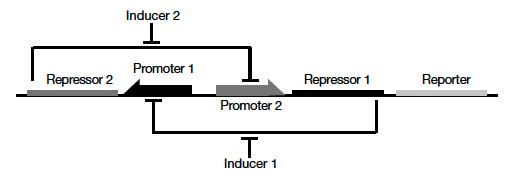

#### Dimensionless Dynamics

The dynamics of the toggle switch gene circuit system are given in a "dimensionless" form. Here $u$ and $v$ are the two protiens. Production is modeled with a repressor Hill function, and degradation is protein concentration dependent. The equation is non-dimensionalized such that the only parameters are $\alpha_{1}$ and $\alpha_{2}$ (the relative expression strengths) and $\beta$ and $\gamma$ the expression ultrasensitivity. The derivation in the appendix shows how these equations relate to the more familiar "dimensional" equations we have used in the past, with more easily interpereted parameters.

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v$



#### Nullclines

We can analyze the dynamics of this system by looking at the nullclines. Nullclines are the manifolds of the system along which the rate of change of a variable is equal to 0. This system has two nullclines, one for the rate of change of $u$ and one for the rate of change of $v$. They can be found by setting the rates of change equal to zero in the above equations.

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u = 0$

$\large u =  \frac{\alpha_{1}}{(1+v^{\beta})}$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v = 0$

$\large v = \frac{\alpha_{2}}{(1+u^{\gamma})}$

By plotting the nullclines we can identify the steady states of the system (where the two lines intersect) and begin to paint a "phase portrait" that describes the system dynamics.


#### Stability Analysis and Robustness Metric Analysis 

In the paper, we saw that the toggle switch does not function if the $\alpha$'s are too miss-matched, or if at least one of the repressors does not exhibit 
. We will adjust the parameters of the equations and simulate dynamics to explore when the toggle switch architecture does and does not give rise to bistability.

Here we will add a new plot that shows the parameters of the system (Figure 2 c, d from the paper). From the paper, we can see that there is an intermediate region of bistability when the $\alpha$ values fall within a cone that has slopes dictaded by the $\beta$ and $\gamma$ values. This region was estimated for high $\alpha$'s so it is an approximation, but it does a fairly good job of describing when the toggle switch will become bistable.

We will approximate the region shown in Figure 2 c, and d, with two lines. The equations for the lines bounding this region are given by:

$\large log(\alpha_{1})=\beta *log(\alpha_{2})$

$\large log(\alpha_{1})=\frac{1}{\gamma} *log(\alpha_{2})$

Now I want to quantify the robustness of the toggle switch system based on the stability analysis. I am doing this by calculating a robustness metric that reflects the system's ability to maintain bistability over a range of parameter values. 
The way I did this is by first identifying the intersection point of the nullclines, which represents the critical point where the system transitions between stable states.Then, I determined the distance from the critical point to the nearest unstable equilibrium point. This distance reflects how robust the system is against perturbations that could destabilize one of the stable states.



# Plotting Dynamics
beta = 3
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

x_max = 15
x = np.linspace(0,x_max,1000)

u = alpha_1/(1+x**beta)
v = alpha_2/(1+x**gamma)

[fig,axs] = plt.subplots(1,2,figsize=[9,4])
axs[0].plot(u,x,'r')
axs[0].plot(x,v,'b')
axs[0].set_xlabel('u')
axs[0].set_ylabel('v')
axs[0].legend(['du/dt = 0','dv/dt = 0']);

# Simulate dynamics
for i in range(10):
    # Initial Conditions
    y0 = 10*np.random.rand(2)
    # time span
    t = np.linspace(0,10,1000)
    tspan = [t[0],t[-1]]
    ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0,t_eval=t)
    # Plot dynamics
    axs[0].plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
    axs[0].plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3)

x_max_2 = 10
x2 = np.linspace(0,x_max_2,100)
y1 = (1/gamma)*x2
y2 = (beta)*x2
axs[1].plot(x2,y1,'k:')
axs[1].plot(x2,y2,'k:')
axs[1].plot(np.log(alpha_2),np.log(alpha_1),'r.')
axs[1].set_xlabel('log(alpha_2)')
axs[1].set_ylabel('log(alpha_1)')
axs[1].set_ylim([0,x_max_2])



In [50]:

from scipy.optimize import fsolve
# Define the stability function
def stability_function(alpha_1, alpha_2, beta, gamma):
    def equations(x):
        u, v = x
        du_dt = alpha_1 / (1 + v**beta) - u
        dv_dt = alpha_2 / (1 + u**gamma) - v
        return [du_dt, dv_dt]

    # Find the critical point (intersection of nullclines)
    u_critical, v_critical = fsolve(equations, [1, 1])

    # Calculate the distance to the nearest unstable equilibrium
    distance = np.linalg.norm([alpha_1/(1+v_critical**beta) - u_critical, alpha_2/(1+u_critical**gamma) - v_critical])

    return distance

# Define parameter values
beta = 3
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

# Calculate robustness metric
robustness = stability_function(alpha_1, alpha_2, beta, gamma)

print("Robustness Metric:", robustness)




Robustness Metric: 2.951773822325497e-14


(0.0, 10.0)

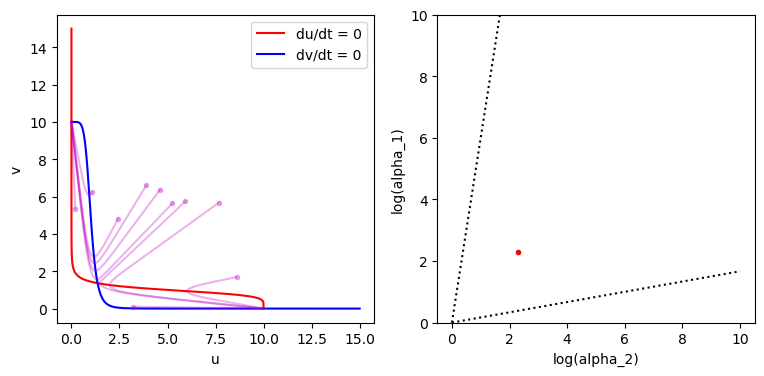

In [53]:
# Plotting Dynamics
beta = 6
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

x_max = 15
x = np.linspace(0,x_max,1000)

u = alpha_1/(1+x**beta)
v = alpha_2/(1+x**gamma)

[fig,axs] = plt.subplots(1,2,figsize=[9,4])
axs[0].plot(u,x,'r')
axs[0].plot(x,v,'b')
axs[0].set_xlabel('u')
axs[0].set_ylabel('v')
axs[0].legend(['du/dt = 0','dv/dt = 0']);

# Simulate dynamics
for i in range(10):
    # Initial Conditions
    y0 = 10*np.random.rand(2)
    # time span
    t = np.linspace(0,10,1000)
    tspan = [t[0],t[-1]]
    ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0,t_eval=t)
    # Plot dynamics
    axs[0].plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
    axs[0].plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3)

x_max_2 = 10
x2 = np.linspace(0,x_max_2,100)
y1 = (1/gamma)*x2
y2 = (beta)*x2
axs[1].plot(x2,y1,'k:')
axs[1].plot(x2,y2,'k:')
axs[1].plot(np.log(alpha_2),np.log(alpha_1),'r.')
axs[1].set_xlabel('log(alpha_2)')
axs[1].set_ylabel('log(alpha_1)')
axs[1].set_ylim([0,x_max_2])



In [49]:

from scipy.optimize import fsolve
# Define the stability function
def stability_function(alpha_1, alpha_2, beta, gamma):
    def equations(x):
        u, v = x
        du_dt = alpha_1 / (1 + v**beta) - u
        dv_dt = alpha_2 / (1 + u**gamma) - v
        return [du_dt, dv_dt]

    # Find the critical point (intersection of nullclines)
    u_critical, v_critical = fsolve(equations, [1, 1])

    # Calculate the distance to the nearest unstable equilibrium
    distance = np.linalg.norm([alpha_1/(1+v_critical**beta) - u_critical, alpha_2/(1+u_critical**gamma) - v_critical])

    return distance

# Define parameter values
beta = 6
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

# Calculate robustness metric
robustness = stability_function(alpha_1, alpha_2, beta, gamma)

print("Robustness Metric:", robustness)




Robustness Metric: 6.691734058910249e-13


(0.0, 10.0)

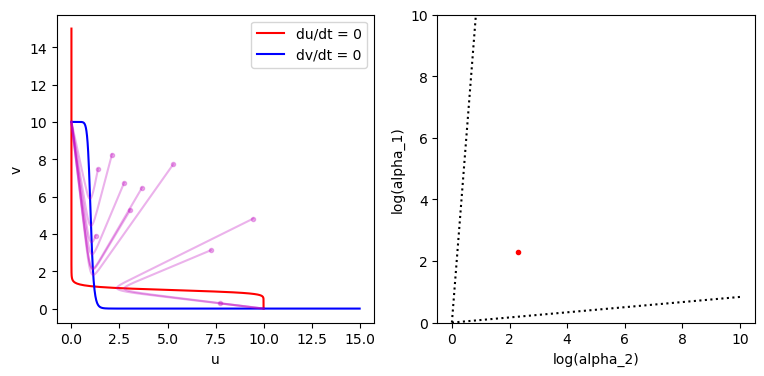

In [56]:
# Plotting Dynamics
beta = 12
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

x_max = 15
x = np.linspace(0,x_max,1000)

u = alpha_1/(1+x**beta)
v = alpha_2/(1+x**gamma)

[fig,axs] = plt.subplots(1,2,figsize=[9,4])
axs[0].plot(u,x,'r')
axs[0].plot(x,v,'b')
axs[0].set_xlabel('u')
axs[0].set_ylabel('v')
axs[0].legend(['du/dt = 0','dv/dt = 0']);

# Simulate dynamics
for i in range(10):
    # Initial Conditions
    y0 = 10*np.random.rand(2)
    # time span
    t = np.linspace(0,10,1000)
    tspan = [t[0],t[-1]]
    ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0,t_eval=t)
    # Plot dynamics
    axs[0].plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
    axs[0].plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3)

x_max_2 = 10
x2 = np.linspace(0,x_max_2,100)
y1 = (1/gamma)*x2
y2 = (beta)*x2
axs[1].plot(x2,y1,'k:')
axs[1].plot(x2,y2,'k:')
axs[1].plot(np.log(alpha_2),np.log(alpha_1),'r.')
axs[1].set_xlabel('log(alpha_2)')
axs[1].set_ylabel('log(alpha_1)')
axs[1].set_ylim([0,x_max_2])



In [57]:

from scipy.optimize import fsolve
# Define the stability function
def stability_function(alpha_1, alpha_2, beta, gamma):
    def equations(x):
        u, v = x
        du_dt = alpha_1 / (1 + v**beta) - u
        dv_dt = alpha_2 / (1 + u**gamma) - v
        return [du_dt, dv_dt]

    # Find the critical point (intersection of nullclines)
    u_critical, v_critical = fsolve(equations, [1, 1])

    # Calculate the distance to the nearest unstable equilibrium
    distance = np.linalg.norm([alpha_1/(1+v_critical**beta) - u_critical, alpha_2/(1+u_critical**gamma) - v_critical])

    return distance

# Define parameter values
beta = 12
gamma = beta
alpha_2 = 10
alpha_1 = alpha_2

# Calculate robustness metric
robustness = stability_function(alpha_1, alpha_2, beta, gamma)

print("Robustness Metric:", robustness)




Robustness Metric: 3.1678185446403847e-12


The values for robustness are very small and close to zero. This suggests that the system is robust, as the nearest unstable equilibrium point is far away from the critical point (intersection of nullclines). In other words, the system's behavior is stable and resilient to small perturbations.

### Robustness Comparison between the 2 systems
From the plot showing normalized robustness values against the common factor 
(non-linearity for Case 1 and beta/gamma for Case 2), we can infer many insights about the robustness of these two cases. one such insight is sensitivity to parameter variation. We can check the sensitivity of each system to variations in the common factor. A steep change in normalized robustness for a small change in the common factor may indicate higher sensitivity to parameter variations in one system compared to the other. (ex: in case 2, there is a sharp decrease in robustness whereas in case 1 it remains relatively uniform.


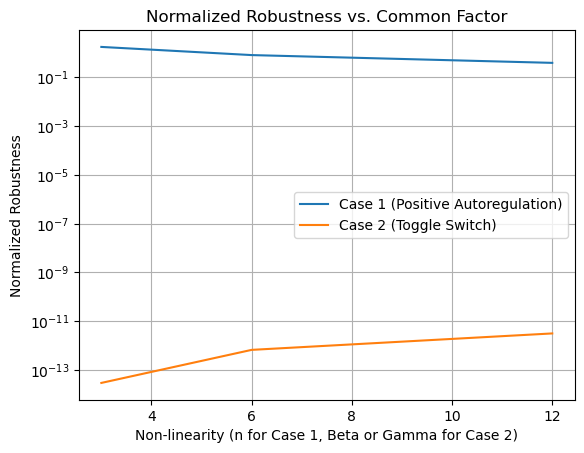

In [58]:

# Robustness values for case 1 (positive autoregulation)
robustness_case1 = [5.35, 4.95, 4.75 ]  # Replace [...] with your robustness values
n_values_case1 = [3, 6, 12]  # Replace [...] with corresponding parameter values (non-linearity)

# Robustness values for case 2 (toggle switch)
robustness_case2 = [2.95e-14, 6.69e-13, 3.16e-12]  # Replace [...] with your robustness values
beta_gamma_values_case2 = [3, 6, 12]  # Replace [...] with corresponding parameter values (beta or gamma)

# Normalize robustness values with respect to parameter values
normalized_robustness_case1 = [r / n for r, n in zip(robustness_case1, n_values_case1)]
normalized_robustness_case2 = robustness_case2

# Plot normalized robustness values against the common factor
plt.plot(n_values_case1, normalized_robustness_case1, label='Case 1 (Positive Autoregulation)')
plt.plot(beta_gamma_values_case2, normalized_robustness_case2, label='Case 2 (Toggle Switch)')
plt.xlabel('Non-linearity (n for Case 1, Beta or Gamma for Case 2)')
plt.ylabel('Normalized Robustness')
plt.title('Normalized Robustness vs. Common Factor')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.legend()
plt.grid(True)
plt.show()
